In [124]:
#import pandas and read the crop file
import pandas as pd 
data = pd.read_excel('crop_recommendation.xlsx',na_values=['?',' ?','? '])
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2161 non-null   float64
 1   P            2104 non-null   float64
 2   K            2059 non-null   float64
 3   temperature  2199 non-null   float64
 4   humidity     2199 non-null   float64
 5   ph           2185 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.6+ KB


In [126]:
#check if there are null values
data.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [127]:
#gives the statistics
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2059.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,49.055367,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,52.020468,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,21.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,32.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,50.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [128]:
#filling of null values
data['N'].fillna(37.000000,inplace=True)
data['P'].fillna(52.000000,inplace=True)
data['K'].fillna(32.000000,inplace=True)
data['temperature'].fillna(25.60037,inplace=True)
data['humidity'].fillna(80.457444,inplace=True)
data['ph'].fillna(6.425420,inplace=True)

In [129]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [130]:
#label is in char so convert using label encoding
data['label'].unique()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['crop_en']=lb.fit_transform(data['label'])


In [131]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_en
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,20
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,20
5,69.0,37.0,42.0,23.058049,83.370118,7.073454,251.055000,rice,20
6,69.0,55.0,38.0,22.708838,82.639414,5.700806,271.324860,rice,20
7,94.0,53.0,40.0,20.277744,82.894086,5.718627,241.974195,rice,20
8,89.0,54.0,38.0,24.515881,83.535216,6.685346,230.446236,rice,20
9,68.0,58.0,38.0,23.223974,83.033227,6.336254,221.209196,rice,20


In [132]:
#to find which columns ar best fit to predict the label(crop)
x1=data.drop('label',axis=1).corr()
x1
#data.corr(['N','P','K','temperature','humidity','ph','rainfall','label'])

,N,P,K,temperature,humidity,ph,rainfall,crop_en
N,1.000000,-0.231346,-0.144424,0.026903,0.178456,0.096519,0.044758,-0.034463
P,-0.231346,1.000000,0.734592,-0.124274,-0.111139,-0.134265,-0.068187,-0.481261
K,-0.144424,0.734592,1.000000,-0.163569,0.177250,-0.166635,-0.060981,-0.347878
temperature,0.026903,-0.124274,-0.163569,1.000000,0.199903,-0.020180,-0.026888,0.113503
humidity,0.178456,-0.111139,0.177250,0.199903,1.000000,-0.003670,0.088600,0.197384
ph,0.096519,-0.134265,-0.166635,-0.020180,-0.003670,1.000000,-0.109440,-0.015582
rainfall,0.044758,-0.068187,-0.060981,-0.026888,0.088600,-0.109440,1.000000,0.042314
crop_en,-0.034463,-0.481261,-0.347878,0.113503,0.197384,-0.015582,0.042314,1.000000


<Axes: >

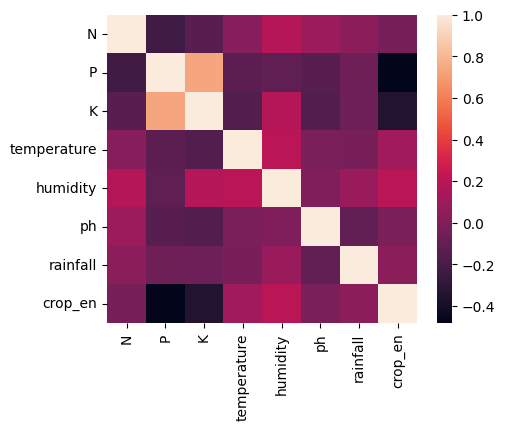

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(x1)

In [134]:
X=data.drop(['label','crop_en'],axis=1)
y=data['label']

In [135]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [136]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=2529)

In [138]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()


In [139]:
lg.fit(X_train,y_train)

c:\Users\akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
lg.score(X_test,y_test)

0.8732954545454545

In [142]:
#to save the model file and write the model(wb)
import pickle 
with open('model.pkl','wb') as model_file:
    pickle.dump(lg,model_file)

In [143]:
lg.predict([[60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248]])

c:\Users\akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['maize'], dtype=object)